In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

In [2]:
prime = pd.read_csv('prime.csv')
len(prime)

662

In [3]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
len(film)

662

In [4]:
screen = pd.read_csv('../01.Data_Collection/screens_final.csv')
len(screen)

39749

In [5]:
timetable = pd.read_csv('../01.Data_Collection/show_timetable.csv')
len(timetable)

13135726

In [6]:
timetable.sample()

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류
9694654,"9,000원",06관,18:45,2017-01-13,사랑하기 때문에,93.000000,롯데시네마 군산나운,디지털


In [7]:
prime = prime.merge(film, how='left', on='영화명')
prime.sample()

,영화명,총공급좌석수,영화코드,개봉일,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모
577,커피 메이트,78244.000000,20166422,2017-03-01,1,멜로/로맨스,청소년관람불가,독립/예술영화,(주)써니엔터테인먼트,(주)스톰픽쳐스코리아,1247,99,43287000.000000,5361,17973000,2159,커피 메이트,이현하,20239946.000000,남자,-,-,-,-,-,-,-,-,-,이현하,이현하,이현하,20239946,남자,감독,커피 메이트,"윤진서,오지호,임수빈,주영민",윤진서,10054538,여자,배우,재혼의 기술|리벤져|커피 메이트|태양을 쏴라 무삭제판|태양을 쏴라|경주|산타바바라|...


In [8]:
daily = prime.merge(screen, how='left', on='영화코드').drop(['개봉일_x', '영화명_y'], axis=1).rename(columns={'F-rated':'F등급', '영화명_x':'영화명', '상영횟수_x':'전체상영횟수', '개봉일_y':'개봉일', '상영횟수_y':'일일상영횟수'})
daily.shape

(39749, 59)

In [10]:
prime.corr()

,총공급좌석수,영화코드,F-rated,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1코드,작가코드,배우코드
총공급좌석수,1.000000,-0.008817,-0.169352,0.995257,0.856550,0.946012,0.942522,0.944463,0.940860,-0.160875,-0.088084,-0.164225
영화코드,-0.008817,1.000000,0.029395,-0.016023,0.051826,-0.028246,-0.036512,-0.037876,-0.045068,0.168475,0.081471,0.130145
F-rated,-0.169352,0.029395,1.000000,-0.171868,-0.188546,-0.164197,-0.164433,-0.158251,-0.158313,0.073293,0.078667,0.131371
상영횟수,0.995257,-0.016023,-0.171868,1.000000,0.877986,0.950390,0.948658,0.949045,0.946966,-0.170416,-0.094813,-0.170770
전국스크린수,0.856550,0.051826,-0.188546,0.877986,1.000000,0.773698,0.772849,0.768457,0.766963,-0.187967,-0.106690,-0.203346
전국매출액,0.946012,-0.028246,-0.164197,0.950390,0.773698,1.000000,0.999249,0.996102,0.995132,-0.153782,-0.088645,-0.148114
전국관객수,0.942522,-0.036512,-0.164433,0.948658,0.772849,0.999249,1.000000,0.995788,0.996159,-0.157401,-0.090497,-0.148671
서울매출액,0.944463,-0.037876,-0.158251,0.949045,0.768457,0.996102,0.995788,1.000000,0.999378,-0.158370,-0.093732,-0.147422
서울관객수,0.940860,-0.045068,-0.158313,0.946966,0.766963,0.995132,0.996159,0.999378,1.000000,-0.161256,-0.095055,-0.147990
감독1코드,-0.160875,0.168475,0.073293,-0.170416,-0.187967,-0.153782,-0.157401,-0.158370,-0.161256,1.000000,0.688125,0.171936


In [14]:
f3 = daily[daily['F등급']==3]
len(f3)

3638

In [21]:
f3['개봉년도'] = f3['개봉일'].apply(lambda x: x.split('-')[0])

In [22]:
f3_2019 = f3[f3['개봉년도']=='2019']

In [34]:
# 2019년 개봉작 F-3 좌석판매율 변화
px.line(f3_2019, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [24]:
f2 = daily[daily['F등급']==2]
f2['개봉년도'] = f2['개봉일'].apply(lambda x: x.split('-')[0])
f2_2019 = f2[f2['개봉년도']=='2019']

In [25]:
# 2019년 개봉작 F-2 좌석판매율 변화
px.line(f2_2019, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [32]:
f1 = daily[daily['F등급']==1]
f1['개봉년도'] = f1['개봉일'].apply(lambda x: x.split('-')[0])
f1_2019 = f1[f1['개봉년도']=='2019']

In [36]:
# 2019년 개봉작 F-1 좌석판매율 변화
px.line(f1_2019, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [39]:
f0 = daily[daily['F등급']==0]
f0['개봉년도'] = f0['개봉일'].apply(lambda x: x.split('-')[0])
f0_2019 = f0[f0['개봉년도']=='2019']

In [40]:
# 2019년 개봉작 F-0 좌석판매율 변화
px.line(f0_2019, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [43]:
px.line(daily[daily['영화명']=='극한직업'], x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,100], range_y=[0,100])

In [44]:
sales = daily[daily['개봉n일차(int)']>=0].groupby(['F등급', '개봉n일차(int)'])['좌석판매율'].mean().reset_index()
sales

,F등급,개봉n일차(int),좌석판매율
0,0,0,15.889474
1,0,1,13.173684
2,0,2,16.266176
3,0,3,20.736257
4,0,4,16.353509
5,0,5,11.137427
6,0,6,11.818824
7,0,7,12.936607
8,0,8,12.172917
9,0,9,14.843243


In [45]:
# F등급별 평균

px.line(sales, x='개봉n일차(int)', y='좌석판매율', color='F등급', range_x=[0,40], range_y=[0,100])

In [47]:
timetable.sample()

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류
7343999,"7,000원",01관,09:20,2019-02-21,사바하,130.000000,메가박스 남포항,디지털


In [53]:
timetable['상영시각_시'] = timetable['상영시각'].apply(lambda x: x.split(':')[0]).astype(int)

In [51]:
timetable.groupby('상영시각_시')['영화명'].value_counts()

상영시각_시  영화명                        
00      언니                                75
        나를 기억해                            37
        맞짱                                31
        미옥                                25
        터닝메카드W: 반다인의 비밀 특별판               21
        그대 이름은 장미                         20
        두 남자                              14
        게이트                               13
        5.18 힌츠페터 스토리                     12
        사라진 밤                             11
        파일 : 4022일의 사육                    11
        칠곡 가시나들                            9
        퍼즐                                 9
        독전                                 8
        석조저택 살인사건                          8
        고향이 어디세요                           6
        군함도                                6
        사랑의 선물                             6
        택시운전사                              6
        김광석                                5
        스타박'스 다방                           4
        내부자들       

In [57]:
prime_timetable = timetable[(timetable['상영시각_시']>=16) & (timetable['상영시각_시']<=22)]
prime_show_count = prime_timetable.groupby('영화명')['상영시각_시'].count().reset_index()
prime_show_count

,영화명,상영시각_시
0,0.0MHz,2963
1,1919 유관순,1423
2,1987,58767
3,"1991, 봄",363
4,1급기밀,4750
5,22,107
6,4등,2010
7,5.18 힌츠페터 스토리,470
8,7년-그들이 없는 언론,791
9,7년의 밤,11584


In [58]:
show_count = timetable.groupby('영화명')['상영시각_시'].count().reset_index()

In [60]:
prime_show_count = prime_show_count.merge(show_count, how='left', on='영화명')
prime_show_count.sample()

,영화명,상영시각_시_x,상영시각_시_y
534,조선마술사,7387,17254


In [62]:
prime_show_count = prime_show_count.rename(columns={'상영시각_시_x':'프라임상영횟수', '상영시각_시_y':'전체상영횟수'})

In [63]:
prime_show_count.sample()

,영화명,프라임상영횟수,전체상영횟수
561,최강전사 미니특공대 : 새로운 악당의 습격,551,4107


In [64]:
prime_show_count['프라임상영비율'] = prime_show_count['프라임상영횟수'] / prime_show_count['전체상영횟수'] * 100

In [65]:
prime_show_count.sample()

,영화명,프라임상영횟수,전체상영횟수,프라임상영비율
5,22,107,424,25.235849


In [66]:
len(prime_show_count)

662

In [68]:
prime_show_count = prime_show_count.merge(prime[['영화명', 'F-rated']], how='left', on='영화명')
prime_show_count.sample()

,영화명,프라임상영횟수,전체상영횟수,프라임상영비율,F-rated
16,강남 1970,21382,46308,46.173447,0


In [69]:
prime_show_count.corr()

,프라임상영횟수,전체상영횟수,프라임상영비율,F-rated
프라임상영횟수,1.000000,0.998542,0.238435,-0.169534
전체상영횟수,0.998542,1.000000,0.212801,-0.169573
프라임상영비율,0.238435,0.212801,1.000000,0.020654
F-rated,-0.169534,-0.169573,0.020654,1.000000


In [70]:
prime_show_count[prime_show_count['영화명']=='극한직업']

,영화명,프라임상영횟수,전체상영횟수,프라임상영비율,F-rated
86,극한직업,133987,289700,46.250259,0


In [71]:
prime_show_count[prime_show_count['영화명']=='벌새']

,영화명,프라임상영횟수,전체상영횟수,프라임상영비율,F-rated
281,벌새,3065,6973,43.955256,3


In [72]:
prime_show_count[prime_show_count['영화명']=='우리들']

,영화명,프라임상영횟수,전체상영횟수,프라임상영비율,F-rated
487,우리들,1253,3384,37.027187,3


In [73]:
timetable = timetable.merge(prime[['영화명', 'F-rated']], how='left', on='영화명')
timetable.sample()

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류,상영시각_시,F-rated
11334468,NaN,샤롯데,09:10,2016-11-07,럭키,30.000000,롯데시네마 센텀시티(백화점)_샤롯데,디지털,9,0


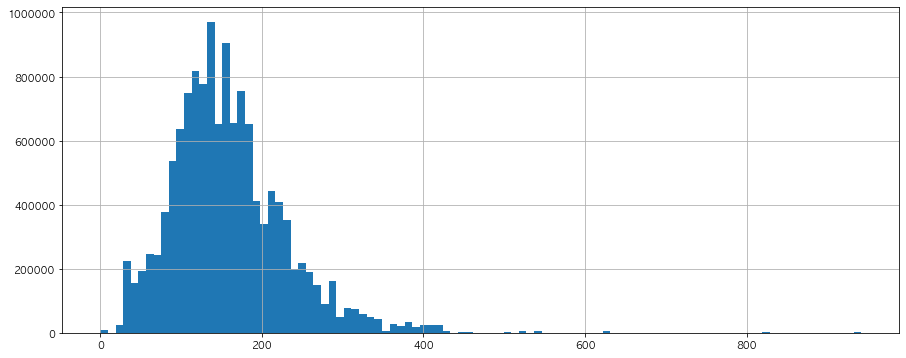

In [78]:
plt.figure(figsize=[15,6])
timetable['좌석수'].hist(bins=100)

In [85]:
screen_scale = timetable.groupby('F-rated')['좌석수'].value_counts()

In [91]:
screen_scale = pd.DataFrame(screen_scale).rename(columns={'좌석수':'규모별상영횟수'}).reset_index()
screen_scale

,F-rated,좌석수,규모별상영횟수
0,0,132.000000,97923
1,0,124.000000,87537
2,0,166.000000,86809
3,0,120.000000,86466
4,0,158.000000,80171
5,0,122.000000,79268
6,0,154.000000,79163
7,0,138.000000,77060
8,0,170.000000,74905
9,0,136.000000,73437


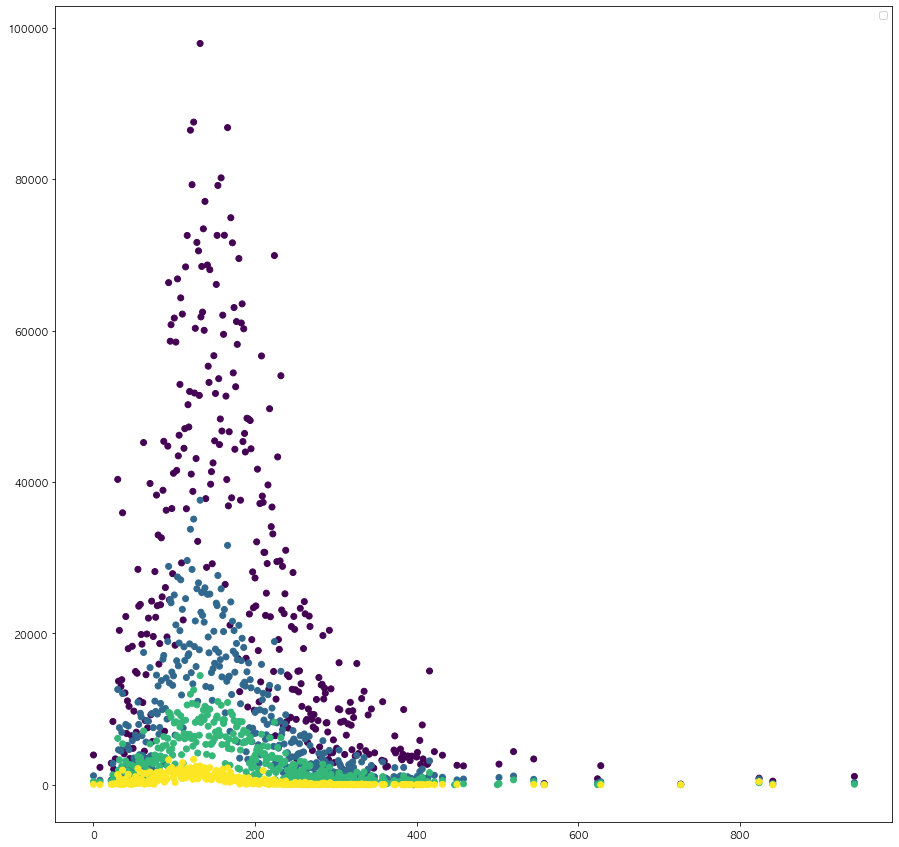

In [101]:
plt.figure(figsize=[15,15])
plt.legend(screen_scale['F-rated'])
plt.scatter('좌석수', '규모별상영횟수', c='F-rated', data=screen_scale)

In [102]:
# 상영횟수를 똑같이 맞춘 후 규모 비교?

In [103]:
timetable.sample()

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류,상영시각_시,F-rated
8754839,"9,000원",03관,19:30,2018-04-10,곤지암,242.000000,롯데시네마 신림,디지털,19,0


In [105]:
truth_beneath = timetable[timetable['영화명']=='비밀은 없다']

In [106]:
len(truth_beneath)

13841

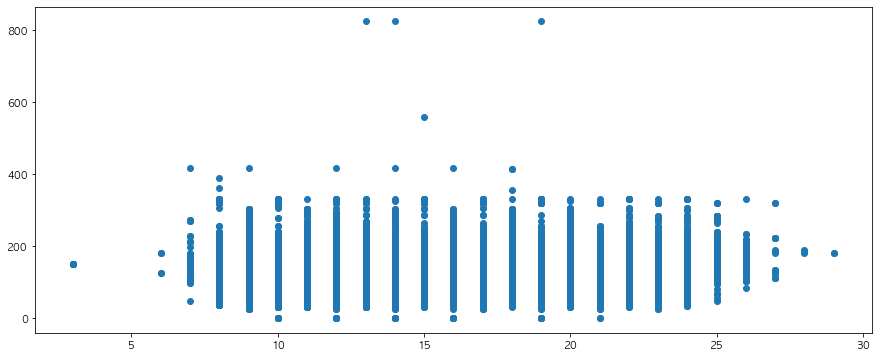

In [110]:
plt.figure(figsize=[15,6])
plt.scatter('상영시각_시', '좌석수', data=truth_beneath)